# Offline Exercise

This notebook has the questions and instructions for the offline exercise. If you haven't already, please go through the `README.md` file before you begin answering the questions here.

Make sure you do NOT commit your answers back to the repo. Instead, copy-paste this notebook together with the `touches.sqlite3` file to a separate folder in your machine, type your answers in that copied notebook, and when you're done, share the new Jupyter notebook back with the recruiter together with additional modules, graphs etc. that you may have. You would need to use the data in the `touches.sqlite3` file to answer all the questions.

### Question 1. Find the most common industry out of all the companies that were `contacted`.

### Show All the Tables in Database

- I will read all the data from database into Pandas dataframes. Pandas dataframes are efficient data structure for fast data manipulation. The alternative can be read data as required but because we need same data for later exercises, therefore I will read data in dataframes.

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect("touches.sqlite3")

cursor = con. cursor()
cursor. execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Following tables are in the database")
print(cursor. fetchall())

con.close()

Following tables are in the database
[('opportunities',), ('companies',), ('persons',), ('touches',)]


### Read data from Oppurtunities Table

In [3]:
con = sqlite3.connect("touches.sqlite3")

# Load the data into a DataFrame
print("opportunities Table Overview")
opportunities = pd.read_sql_query("SELECT * from opportunities", con)

con.close()

opportunities.head(5)

opportunities Table Overview


,id,company_id,created_at,latest_stage
0,1,3633,2018-01-01 20:38:03.267059,Closed Lost
1,3,5639,2018-01-01 20:38:03.316160,Closed Lost
2,4,886,2018-01-01 20:38:03.334316,Closed Lost
3,5,588,2018-01-01 20:38:03.343280,Closed Lost
4,6,4798,2018-01-01 20:38:03.346662,Closed Lost


### Extract Companies being contacted

- We can do this using SQL or Pandas

### Extract Companies being contacted using SQL

In [4]:
con = sqlite3.connect("touches.sqlite3")

companies_being_contacted_sql = pd.read_sql_query("SELECT * from opportunities WHERE latest_stage IN ('Closed Won', 'Closed Lost', 'Disqualified')", con)

con.close()

print("Total companies being contacted are {}".format(companies_being_contacted_sql.shape[0]))

companies_being_contacted_sql.head(5)

Total companies being contacted are 5627


,id,company_id,created_at,latest_stage
0,1,3633,2018-01-01 20:38:03.267059,Closed Lost
1,3,5639,2018-01-01 20:38:03.316160,Closed Lost
2,4,886,2018-01-01 20:38:03.334316,Closed Lost
3,5,588,2018-01-01 20:38:03.343280,Closed Lost
4,6,4798,2018-01-01 20:38:03.346662,Closed Lost


### Extract Companies being contacted using Pandas

In [5]:
companies_being_contacted_pandas = opportunities[opportunities['latest_stage'].isin(['Closed Won', 'Closed Lost', 'Disqualified'])]

print("Total companies being contacted are {}".format(companies_being_contacted_pandas.shape[0]))

companies_being_contacted_pandas.head(5)

Total companies being contacted are 5627


,id,company_id,created_at,latest_stage
0,1,3633,2018-01-01 20:38:03.267059,Closed Lost
1,3,5639,2018-01-01 20:38:03.316160,Closed Lost
2,4,886,2018-01-01 20:38:03.334316,Closed Lost
3,5,588,2018-01-01 20:38:03.343280,Closed Lost
4,6,4798,2018-01-01 20:38:03.346662,Closed Lost


### Read data from Companies Table

In [6]:
con = sqlite3.connect("touches.sqlite3")

# Load the data into a DataFrame
print("companies Table Overview")
companies = pd.read_sql_query("SELECT * from companies", con)

con.close()

companies.head(5)

companies Table Overview


,id,industry,size,location
0,1,Diversified Telecommunication Services,51-200 employees,US/Eastern
1,2,Internet Software & Services,51-200 employees,US/Mountain
2,4,Internet Software & Services,,US/Pacific
3,6,Diversified Financial Services,11-50 employees,US/Pacific
4,8,Telecommunications,,US/Eastern


### Read data from Persons Table

In [7]:
con = sqlite3.connect("touches.sqlite3")

# Load the data into a DataFrame
print("persons Table Overview")
persons = pd.read_sql_query("SELECT * from persons", con)

con.close()

persons.head(5)

persons Table Overview


,id,company_id,job_seniority
0,61,1,Vice President
1,62,1,Manager
2,63,1,Executive
3,64,1,Director
4,65,1,Individual Contributor


### Read data from Touches Table

In [8]:
con = sqlite3.connect("touches.sqlite3")

# Load the data into a DataFrame
print("touches Table Overview")
touches = pd.read_sql_query("SELECT * from touches", con)

con.close()

touches.head(5)

touches Table Overview


,id,person_id,touch_scheduled_on,status,touch_type
0,166087,127117,2017-06-01,completed,Phone
1,166088,108969,2017-06-01,completed,Other
2,166089,107761,2017-06-01,completed,Phone
3,166091,77118,2017-06-01,completed,Other
4,166093,106696,2017-06-01,completed,Other


## Data Understanding

The agent contact person in a company (the person can be of any designation) through email or phone or other ways. In this the negotiation/ engagement started. The agent carry on negotiation and then at final stages either the contract with company lost or win or disqualified. 

There are 4 tables and tables are inter-connected through fields (which can be used to join tables). Different tables represent different entities.

All the columns are of categorical type except two which are date type. 

In [9]:
print("Create Combine DataFrame")

dataset = touches.merge(persons, on='id', how='left')

dataset = dataset.merge(companies, left_on='company_id', right_on="id", how='left')
dataset['company_id'] = dataset['company_id'].fillna(0)
dataset['company_id'] = dataset['company_id'].astype(int)

dataset = dataset.merge(opportunities, on='company_id', how='left')

dataset.head(5)

Create Combine DataFrame


,id_x,person_id,touch_scheduled_on,status,touch_type,company_id,job_seniority,id_y,industry,size,location,id,created_at,latest_stage
0,166087,127117,2017-06-01,completed,Phone,8542,Vice President,8542.0,Air Freight & Logistics,,US/Pacific,NaN,NaN,NaN
1,166088,108969,2017-06-01,completed,Other,8542,Manager,8542.0,Air Freight & Logistics,,US/Pacific,NaN,NaN,NaN
2,166089,107761,2017-06-01,completed,Phone,8542,Director,8542.0,Air Freight & Logistics,,US/Pacific,NaN,NaN,NaN
3,166091,77118,2017-06-01,completed,Other,8542,Unknown,8542.0,Air Freight & Logistics,,US/Pacific,NaN,NaN,NaN
4,166093,106696,2017-06-01,completed,Other,8542,Vice President,8542.0,Air Freight & Logistics,,US/Pacific,NaN,NaN,NaN


In [10]:
dataset.drop_duplicates(subset=['person_id'])['latest_stage'].value_counts()

Closed Lost     1014
Closed Won       428
Disqualified     284
Discovery         40
Developing        29
SDR Open          13
Name: latest_stage, dtype: int64

### Companies Types Contacted

In [11]:
companies_types = companies[companies['id'].isin(companies_being_contacted_pandas['company_id'].values)]

Text(0.5, 1.0, 'Top 20 Industry Types')

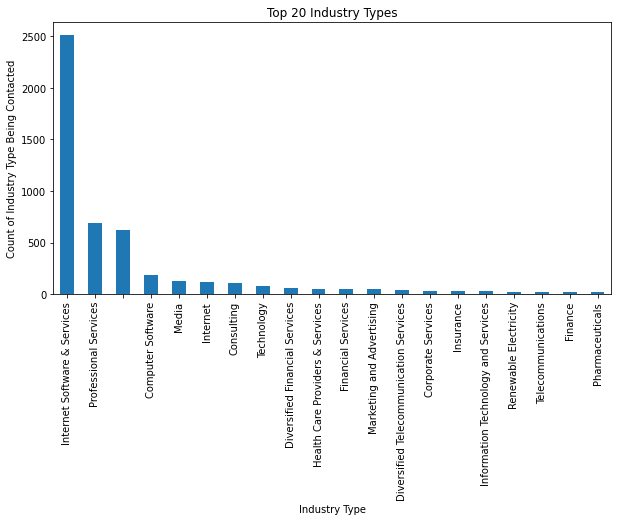

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
companies_types["industry"].value_counts().head(20).plot.bar()
plt.ylabel("Count of Industry Type Being Contacted")
plt.xlabel("Industry Type")
plt.title("Top 20 Industry Types")

In [13]:
companies_types["industry"].value_counts()

Internet Software & Services     2512
Professional Services             685
                                  625
Computer Software                 188
Media                             126
                                 ... 
Human Resources Software            1
Not For Profit                      1
Metals & Mining                     1
Food & Beverage                     1
Software Development & Design       1
Name: industry, Length: 191, dtype: int64

In [14]:
companies_types["industry"].value_counts(normalize=True).mul(100).round(2)

Internet Software & Services     44.64
Professional Services            12.17
                                 11.11
Computer Software                 3.34
Media                             2.24
                                 ...  
Human Resources Software          0.02
Not For Profit                    0.02
Metals & Mining                   0.02
Food & Beverage                   0.02
Software Development & Design     0.02
Name: industry, Length: 191, dtype: float64

## `INTERNET SOFTWARE & SERVICES` is the most common industry out of all the companies that were contacted.

### Question 2. What is the most common touch type sellers use when they’re making their first touch with a person? What about first touch with a company?

In [15]:
touches = touches.sort_values(by='touch_scheduled_on')
common_touch_type_person = touches.groupby('person_id').first().reset_index()
common_touch_type_person

,person_id,id,touch_scheduled_on,status,touch_type
0,64,614121,2018-09-11,completed,Email
1,66,166558,2017-06-01,completed,Phone
2,82,166380,2017-06-01,completed,Phone
3,84,176348,2017-06-15,completed,Email
4,88,656195,2018-10-03,completed,Email
...,...,...,...,...,...
61030,235418,597161,2018-08-31,completed,Email
61031,235419,626983,2018-09-18,completed,Email
61032,235422,626792,2018-09-18,completed,Email
61033,235423,168292,2017-06-05,completed,Email


Text(0.5, 1.0, 'Top touch_type - Person')

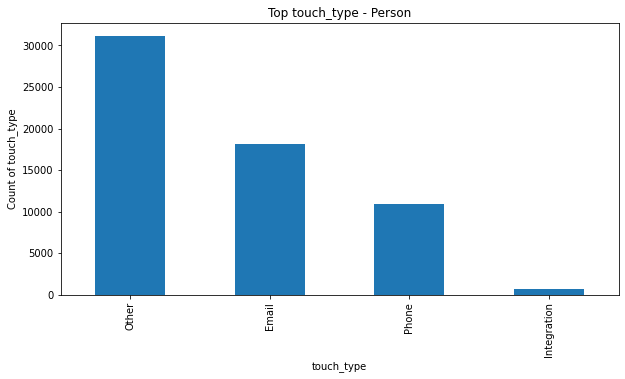

In [16]:
plt.figure(figsize=(10, 5))
common_touch_type_person["touch_type"].value_counts().plot.bar()
plt.ylabel("Count of touch_type")
plt.xlabel("touch_type")
plt.title("Top touch_type - Person")

In [17]:
common_touch_type_person["touch_type"].value_counts()

Other          31137
Email          18173
Phone          10979
Integration      746
Name: touch_type, dtype: int64

In [18]:
common_touch_type_person["touch_type"].value_counts(normalize=True).mul(100).round(2)

Other          51.01
Email          29.77
Phone          17.99
Integration     1.22
Name: touch_type, dtype: float64

### Most common type of touch is `Other` when making their first touch with person.

In [19]:
dataset = dataset.sort_values(by='touch_scheduled_on')
common_touch_type_companies = dataset.groupby('company_id').first().reset_index()
common_touch_type_companies

,company_id,id_x,person_id,touch_scheduled_on,status,touch_type,job_seniority,id_y,industry,size,location,id,created_at,latest_stage
0,0,166657,92895,2017-06-01,completed,Phone,None,NaN,None,None,None,NaN,None,None
1,5886,166121,87516,2017-06-01,completed,Phone,Director,5886.0,,,,1261.0,2018-02-07 15:54:32.581178,Closed Lost
2,5889,166218,89146,2017-06-01,completed,Phone,Individual Contributor,5889.0,Software,,US/Central,7199.0,2018-09-13 14:19:40.436850,Discovery
3,5890,166322,135460,2017-06-01,completed,Email,Director,5890.0,Diversified Telecommunication Services,,US/Pacific,3585.0,2018-03-09 22:37:36.231851,Closed Lost
4,5891,166337,34906,2017-06-01,completed,Phone,Unknown,5891.0,Internet Software & Services,,US/Pacific,3174.0,2018-02-13 19:56:41.858390,Closed Lost
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,14859,229485,155765,2017-09-14,completed,Other,Executive,14859.0,Internet,,US/Eastern,NaN,None,None
7056,14860,200257,51679,2017-07-27,completed,Other,Manager,14860.0,Internet Software & Services,51-200 employees,US/Pacific,NaN,None,None
7057,14862,168208,123905,2017-06-05,completed,Email,Unknown,14862.0,"Technology Hardware, Storage & Peripherals","10,001+ employees",US/Pacific,NaN,None,None
7058,14864,178425,22793,2017-06-20,completed,Other,Director,14864.0,Insurance,,US/Pacific,NaN,None,None


Text(0.5, 1.0, 'Top touch_type - Company')

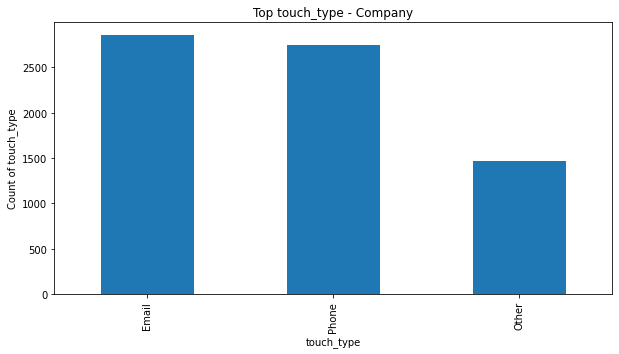

In [20]:
plt.figure(figsize=(10, 5))
common_touch_type_companies["touch_type"].value_counts().head(20).plot.bar()
plt.ylabel("Count of touch_type")
plt.xlabel("touch_type")
plt.title("Top touch_type - Company")

In [21]:
common_touch_type_companies["touch_type"].value_counts()

Email    2854
Phone    2741
Other    1465
Name: touch_type, dtype: int64

In [22]:
common_touch_type_companies["touch_type"].value_counts(normalize=True).mul(100).round(2)

Email    40.42
Phone    38.82
Other    20.75
Name: touch_type, dtype: float64

### Most common type of touch is `Email` when making their first touch with company.

### Question 3. Describe the distribution of the job seniorities of people that a seller will first try to contact within a company.

To answer this question, you may use visuals, graphs, bunch of scores, tables, writeups - whatever you want. We literally want you to "describe" the distribution to us in the best way you can!

(Note: this question doesn't really have one right answer. It's more about your style of communicating the results.)


### Solution

I have used `pandas groupby` to find the first ever contact with a company. So for example agent have contacted company first time with director, then with president. Similarly another company have first contact with manager and then second with director. According to the requirements in question, i have extracted the first contact only. Then I have bar plot of job seniorities, this will give us the distribution.

Text(0.5, 1.0, 'Top job_seniority - Company')

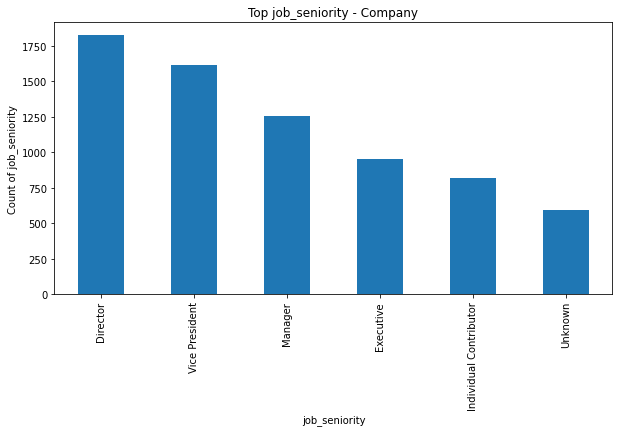

In [23]:
plt.figure(figsize=(10, 5))
common_touch_type_companies["job_seniority"].value_counts().head(20).plot.bar()
plt.ylabel("Count of job_seniority")
plt.xlabel("job_seniority")
plt.title("Top job_seniority - Company")

In [24]:
common_touch_type_companies["job_seniority"].value_counts()

Director                  1825
Vice President            1614
Manager                   1256
Executive                  954
Individual Contributor     817
Unknown                    593
Name: job_seniority, dtype: int64

In [25]:
common_touch_type_companies["job_seniority"].value_counts(normalize=True).mul(100).round(2)

Director                  25.85
Vice President            22.86
Manager                   17.79
Executive                 13.51
Individual Contributor    11.57
Unknown                    8.40
Name: job_seniority, dtype: float64

### Comments

As we have combine dataset (consist all information). Mostly people contact `Directors` as first contact with company. Then `Vice President` and so on. 

### Question 4. Describe the distribution of the mixture of job seniorities of people that a seller will touch during the entire engagement with a company.
Keep in mind that you get to decide what “mixture” means, so do begin your answer by defining it - and explaining why you think this definition makes sense. Again, feel free to use whatever visuals, graphs, bunch of scores, tables, writeups etc. that you think is appropriate for this question.

(Note: this question doesn't really have one right answer. It's more about your style of communicating the results.)

### Mixture

Mixture in this is the different people called using different types during entire journey as per my understanding. Different types of scenerios can be covered. 

<AxesSubplot:xlabel='latest_stage', ylabel='count'>

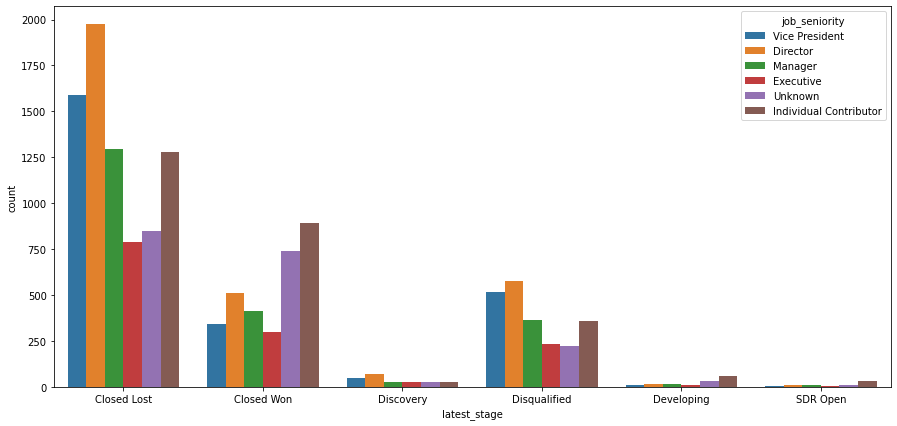

In [26]:
import seaborn as sns
plt.figure(figsize=(15, 7))
sns.countplot(x='latest_stage', hue='job_seniority', data=dataset)

### Comments on above Graph

You can see that whenever agent contact higher designations (senior people) of the companies, there is highest chance of contract to be lost. In order to won contract, its better to start negotiation with juniors of the company and then slowly approaching seniors in successive contacts. 

<AxesSubplot:xlabel='latest_stage', ylabel='count'>

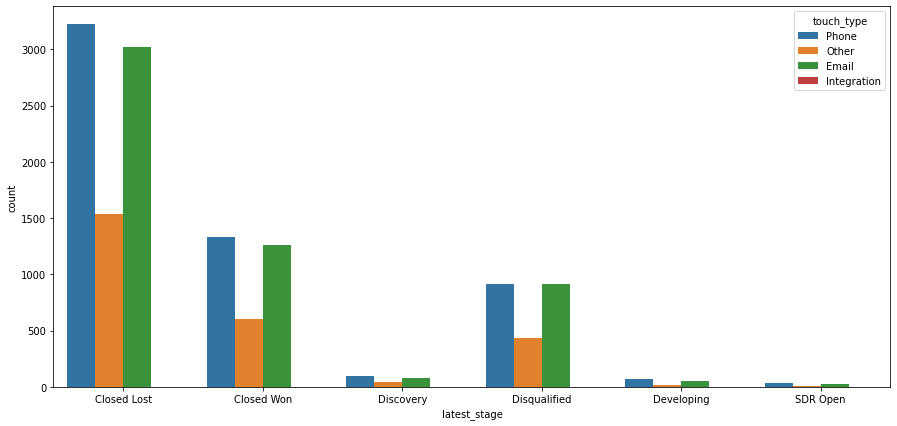

In [27]:
plt.figure(figsize=(15, 7))
sns.countplot(x='latest_stage', hue='touch_type', data=dataset)

<AxesSubplot:xlabel='latest_stage', ylabel='count'>

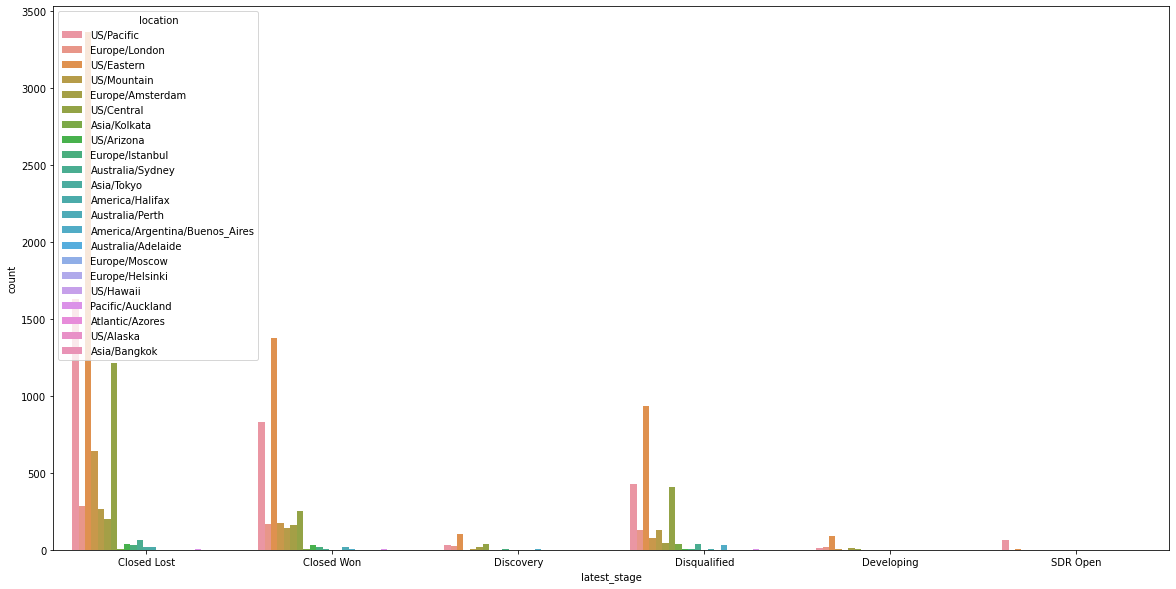

In [28]:
plt.figure(figsize=(20, 10))
sns.countplot(x='latest_stage', hue='location', data=dataset)

<AxesSubplot:xlabel='Month', ylabel='count'>

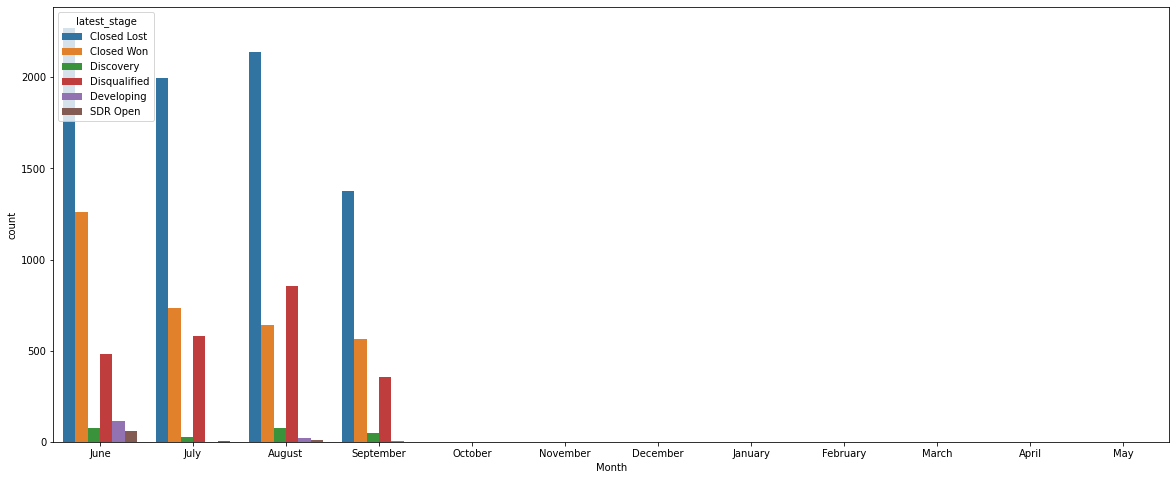

In [29]:
dataset['touch_scheduled_on'] = pd.to_datetime(dataset['touch_scheduled_on'])
dataset['Month'] = dataset['touch_scheduled_on'].dt.month_name()
plt.figure(figsize=(20, 8))
sns.countplot(x='Month', hue='latest_stage', data=dataset)

<AxesSubplot:xlabel='day', ylabel='count'>

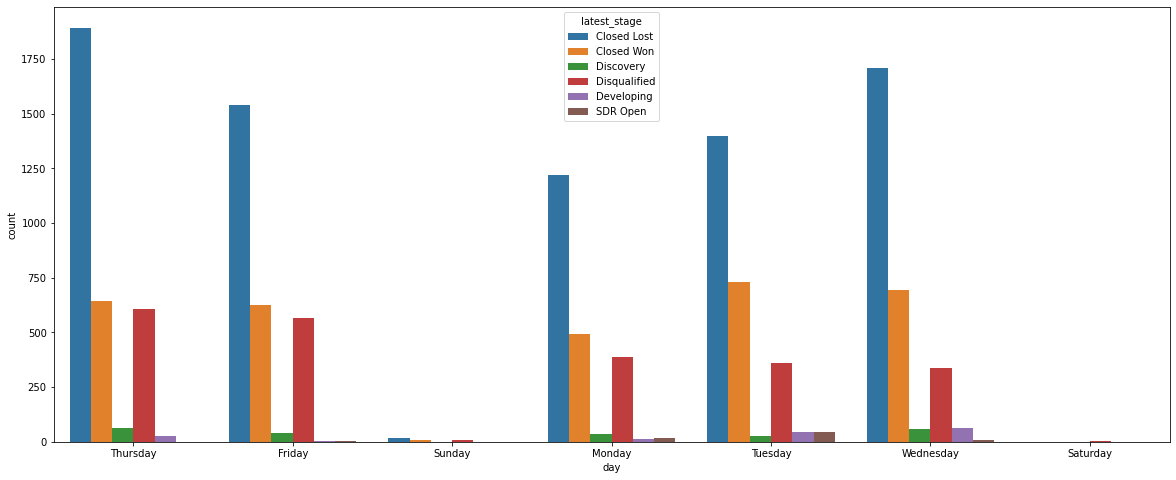

In [30]:
dataset['touch_scheduled_on'] = pd.to_datetime(dataset['touch_scheduled_on'])
dataset['day'] = dataset['touch_scheduled_on'].dt.day_name()
plt.figure(figsize=(20, 8))
sns.countplot(x='day', hue='latest_stage', data=dataset)

### Comments

There is high chance of winning contract when agent call/ touch people of companies on `Monday`, `Tuesday` or `Friday`. On other days due to busy schedule, chance of losing contracts increases.

### Question 5. Build an algorithm that, when a seller is about to contact a company it never reached out to before, recommends the best/optimal mixture of job seniorities (with “mixture” as defined by you in Question 4.) they should be targeting within that company during the entire engagement.

This is the hardest question in this exercise. If you feel you have a good idea what the algorithm should look like but either feel uncomfortable coding-wise or feel pressed for time, it is perfectly OK to describe your idea in words. Be clear, explain both what it does and why you think this is the right approach.

Whether or not you go the code-route or writeup-route, be sure to explain the assumptions and choices you made, why you made them and how you would test them.

(Note: like with the previous two questions, this question doesn't really have one right answer either!)

In [31]:
data_for_algo = dataset[~dataset['latest_stage'].isna()]
data_for_algo = data_for_algo[data_for_algo['latest_stage'].isin(['Closed Won', 'Closed Lost', 'Disqualified'])]
data_for_algo

,id_x,person_id,touch_scheduled_on,status,touch_type,company_id,job_seniority,id_y,industry,size,location,id,created_at,latest_stage,Month,day
425,166683,76349,2017-06-01,completed,Phone,5906,Director,5906.0,Internet Software & Services,25-50,Europe/London,7770.0,2018-10-30 18:15:02.584597,Closed Lost,June,Thursday
426,166684,148739,2017-06-01,completed,Phone,5906,Vice President,5906.0,Internet Software & Services,25-50,Europe/London,7770.0,2018-10-30 18:15:02.584597,Closed Lost,June,Thursday
424,166682,102048,2017-06-01,completed,Phone,5906,Director,5906.0,Internet Software & Services,25-50,Europe/London,7770.0,2018-10-30 18:15:02.584597,Closed Lost,June,Thursday
423,166680,3006,2017-06-01,completed,Email,5906,Unknown,5906.0,Internet Software & Services,25-50,Europe/London,7770.0,2018-10-30 18:15:02.584597,Closed Lost,June,Thursday
421,166677,148112,2017-06-01,completed,Phone,5906,Manager,5906.0,Internet Software & Services,25-50,Europe/London,7770.0,2018-10-30 18:15:02.584597,Closed Lost,June,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48029,235318,159021,2017-09-25,completed,Email,8302,Unknown,8302.0,Software Development & Design,,US/Eastern,8292.0,2018-12-18 19:37:45.473243,Disqualified,September,Monday
48031,235321,88574,2017-09-25,completed,Email,8302,Executive,8302.0,Software Development & Design,,US/Eastern,8292.0,2018-12-18 19:37:45.473243,Disqualified,September,Monday
48032,235323,121900,2017-09-25,completed,Phone,8302,Director,8302.0,Software Development & Design,,US/Eastern,8292.0,2018-12-18 19:37:45.473243,Disqualified,September,Monday
48033,235324,70828,2017-09-25,completed,Other,8302,Director,8302.0,Software Development & Design,,US/Eastern,8292.0,2018-12-18 19:37:45.473243,Disqualified,September,Monday


In [32]:
features = ['touch_type', 'job_seniority', 'industry', 'size', 'location', 'day', 'latest_stage']
data_for_algo = data_for_algo[features]
data_for_algo = data_for_algo.drop_duplicates()
data_for_algo

,touch_type,job_seniority,industry,size,location,day,latest_stage
425,Phone,Director,Internet Software & Services,25-50,Europe/London,Thursday,Closed Lost
426,Phone,Vice President,Internet Software & Services,25-50,Europe/London,Thursday,Closed Lost
423,Email,Unknown,Internet Software & Services,25-50,Europe/London,Thursday,Closed Lost
421,Phone,Manager,Internet Software & Services,25-50,Europe/London,Thursday,Closed Lost
422,Other,Director,Internet Software & Services,25-50,Europe/London,Thursday,Closed Lost
...,...,...,...,...,...,...,...
48029,Email,Unknown,Software Development & Design,,US/Eastern,Monday,Disqualified
48031,Email,Executive,Software Development & Design,,US/Eastern,Monday,Disqualified
48032,Phone,Director,Software Development & Design,,US/Eastern,Monday,Disqualified
48033,Other,Director,Software Development & Design,,US/Eastern,Monday,Disqualified


In [33]:
data_for_algo.isna().sum()

touch_type       0
job_seniority    0
industry         0
size             0
location         0
day              0
latest_stage     0
dtype: int64

## We have tried Machine Learning to detect the Percentage of Lost Contract using Random Forest Classification

In [36]:
import warnings
warnings.filterwarnings('ignore')

encoding = {}
for c in data_for_algo.columns:
    if c in ["latest_stage"]:
        continue
    else:
        data_for_algo[c] = data_for_algo[c].fillna("Others")
        d = pd.get_dummies(data_for_algo[c], prefix=c)
        data_for_algo = data_for_algo.drop(columns=[c])
        data_for_algo[d.columns] = d
        encoding.update({c:d.columns})
Y = data_for_algo[["latest_stage"]]
X = data_for_algo.drop(columns=["latest_stage"])

In [37]:
# library for Machine Learning Models
from sklearn.ensemble import RandomForestClassifier    
    
# Library for Training and testing data split
from sklearn.model_selection import train_test_split

# libraries for confusion Matrix, Classification Repports, ROC and AUC
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y)

# make Random Forest Classifier object
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# Train Algo on training data
forest.fit(X_train, y_train)

# Predict target for testing data
y_pred = forest.predict(X_test)

print("Classification Report")
confusion_report = classification_report(y_test, y_pred)
print(confusion_report)

print("\nConfusion Matrix")
confusion_attack = confusion_matrix(y_test, y_pred)
print(confusion_attack) 

Classification Report
              precision    recall  f1-score   support

 Closed Lost       0.71      0.84      0.77      1017
  Closed Won       0.62      0.51      0.56       444
Disqualified       0.61      0.45      0.52       373

    accuracy                           0.68      1834
   macro avg       0.65      0.60      0.62      1834
weighted avg       0.67      0.68      0.67      1834


Confusion Matrix
[[852  97  68]
 [178 225  41]
 [162  42 169]]


In [38]:
X.columns

Index(['touch_type_Email', 'touch_type_Other', 'touch_type_Phone',
       'job_seniority_Director', 'job_seniority_Executive',
       'job_seniority_Individual Contributor', 'job_seniority_Manager',
       'job_seniority_Unknown', 'job_seniority_Vice President', 'industry_',
       ...
       'location_US/Eastern', 'location_US/Mountain', 'location_US/Pacific',
       'day_Friday', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object', length=213)

## User System Example

- If the company is of type `Internet Software & Services` AND
- Size of company is `25-30` AND
- Location of company is `Europe/London`, then how you should touch and whom should be contacted?

In [39]:
rec = [0]*len(X.columns)
for designation in encoding['job_seniority']:
    for touch_typ in encoding['touch_type']:
        for day in encoding['day']:
            for c in ['Internet Software & Services', '25-30', 'Europe/London']:    
                for i in range(len(X.columns)):
                    if c in X.columns[i]:
                        rec[i] = 1
            rec[X.columns.values.tolist().index(designation)] = 1
            rec[X.columns.values.tolist().index(touch_typ)] = 1
            rec[X.columns.values.tolist().index(day)] = 1
            print("If you contact {0} through {1} on {2}, then there is {3}% chance to LOST".format(designation.split("_")[-1], touch_typ.split("_")[-1], day.split("_")[-1], round(forest.predict_proba([rec])[0][0]*100,2)))
            print("---------------------------------------------------------------------------------")

If you contact Director through Email on Friday, then there is 40.4% chance to LOST
---------------------------------------------------------------------------------
If you contact Director through Email on Monday, then there is 39.17% chance to LOST
---------------------------------------------------------------------------------
If you contact Director through Email on Saturday, then there is 39.17% chance to LOST
---------------------------------------------------------------------------------
If you contact Director through Email on Sunday, then there is 41.84% chance to LOST
---------------------------------------------------------------------------------
If you contact Director through Email on Thursday, then there is 43.19% chance to LOST
---------------------------------------------------------------------------------
If you contact Director through Email on Tuesday, then there is 47.3% chance to LOST
-----------------------------------------------------------------------------

If you contact Individual Contributor through Other on Sunday, then there is 45.18% chance to LOST
---------------------------------------------------------------------------------
If you contact Individual Contributor through Other on Thursday, then there is 45.18% chance to LOST
---------------------------------------------------------------------------------
If you contact Individual Contributor through Other on Tuesday, then there is 45.18% chance to LOST
---------------------------------------------------------------------------------
If you contact Individual Contributor through Other on Wednesday, then there is 45.18% chance to LOST
---------------------------------------------------------------------------------
If you contact Individual Contributor through Phone on Friday, then there is 45.18% chance to LOST
---------------------------------------------------------------------------------
If you contact Individual Contributor through Phone on Monday, then there is 45.18% chanc

If you contact Unknown through Phone on Tuesday, then there is 49.95% chance to LOST
---------------------------------------------------------------------------------
If you contact Unknown through Phone on Wednesday, then there is 49.95% chance to LOST
---------------------------------------------------------------------------------
If you contact Vice President through Email on Friday, then there is 47.55% chance to LOST
---------------------------------------------------------------------------------
If you contact Vice President through Email on Monday, then there is 47.55% chance to LOST
---------------------------------------------------------------------------------
If you contact Vice President through Email on Saturday, then there is 47.55% chance to LOST
---------------------------------------------------------------------------------
If you contact Vice President through Email on Sunday, then there is 47.55% chance to LOST
----------------------------------------------------